In [4]:
from process_utils import *

In [13]:
DATA_PATH='/Volumes/BPlus/dataset/miccai2021/rsna-miccai-brain-tumor-radiogenomic-classification'
TRAIN_DIR='%s/train'%DATA_PATH
TRAIN_LABELS='%s/train_labels.csv'%DATA_PATH

In [65]:
df = pd.read_csv(TRAIN_LABELS)
p_label, v_label = df['BraTS21ID'], df['MGMT_value']
p_label v_label = np.array(p_label), np.array(v_label)
p_label.shape, v_label.shape

((585,), (585,))

In [6]:
patients = [file for file in os.listdir(TRAIN_DIR) if not file.startswith("._")]
img_types=['FLAIR', 'T1w', "T1wCE", "T2w"]
print(patients[:10])

['00000', '00002', '00003', '00005', '00006', '00008', '00009', '00011', '00012', '00014']


(64, 32, 32, 128) None None [1, 0]


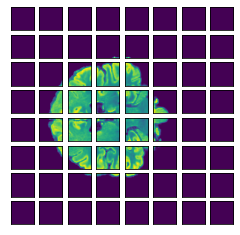

(64, 32, 32, 128) None 0 [1, 0]


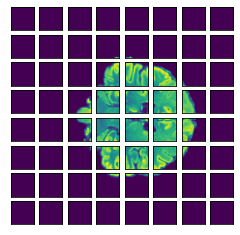

(64, 32, 32, 128) None 1 [1, 0]


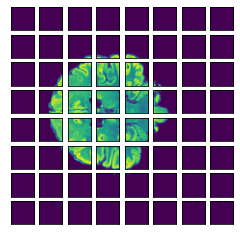

(64, 32, 32, 128) 0 None [1, 0]


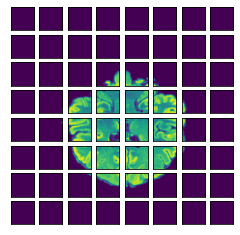

(64, 32, 32, 128) 0 0 [1, 0]


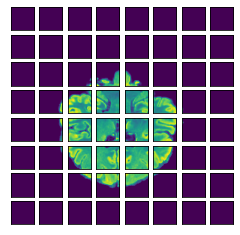

(64, 32, 32, 128) 0 1 [1, 0]


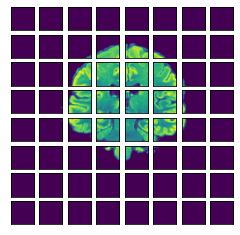

In [70]:
pid, typeid = 0, 0

for r in [None, 0]:
    for f in [None, 0, 1]:
        dcm_list = get_dcm_files(TRAIN_DIR, patients[pid], img_types[typeid])
        dcm_arr = load_dcm_imgs_3d(dcm_list, num_imgs=128, img_size=256, rotate=r, flip=f)
        patches = img_2_patches(dcm_arr, crop_size=32)
        y = [v_label[p_label==int(pid)][0], p_label[p_label==int(pid)][0]]
        print(patches.shape, r, f, y)
    
        plot_patches(patches,ch=32)

In [71]:
x_data=np.load("x_data.npy")

In [72]:
x_data.shape

(12, 64, 32, 32, 128)